In [68]:
# https://pytorch.org/docs/stable/torchvision/models.html#object-detection-instance-segmentation-and-person-keypoint-detection

### imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.vision import *
from fastai.vision.interpret import *
import fastai; fastai.__version__

'1.0.55.dev0'

In [3]:
data_path = Path("../../data/siim_acr_pneu/"); data_path.ls()

[PosixPath('../../data/siim_acr_pneu/train'),
 PosixPath('../../data/siim_acr_pneu/clas_df.csv'),
 PosixPath('../../data/siim_acr_pneu/dicom-images-test'),
 PosixPath('../../data/siim_acr_pneu/models'),
 PosixPath('../../data/siim_acr_pneu/dicom-images-train'),
 PosixPath('../../data/siim_acr_pneu/train-rle.csv'),
 PosixPath('../../data/siim_acr_pneu/seg_df.csv'),
 PosixPath('../../data/siim_acr_pneu/learn'),
 PosixPath('../../data/siim_acr_pneu/test')]

In [4]:
torch.cuda.set_device(5)

In [8]:
from torchvision.models.detection import maskrcnn_resnet50_fpn

In [10]:
model = maskrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /home/turgutluk/.cache/torch/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 178090079/178090079 [00:21<00:00, 8330215.46it/s] 


In [19]:
img = open_image("uswnt-world-cup.jpg")

In [29]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [38]:
img = img.resize(224)

In [39]:
input = normalize(img.data, tensor(imagenet_stats[0]), tensor(imagenet_stats[1]))

In [40]:
model.eval();

In [41]:
input.shape

torch.Size([3, 224, 224])

In [43]:
output = model([input])

In [49]:
out_dict = output[0]

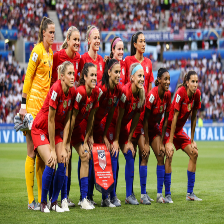

In [66]:
img

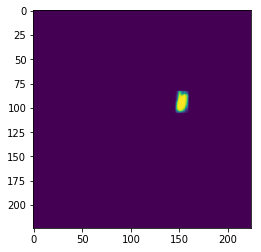

In [67]:
plt.imshow(out_dict['masks'][12][0])